In [8]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split as ttp
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
true=pd.read_excel("/content/truefile.xlsx")
false=pd.read_excel("/content/falsefile.xlsx")
true.head(5)
false.head(5)
shape_1=true.shape
shape_2=false.shape
print(shape_1)
print(shape_2)
true["class"]=1
false["class"]=0
data_true_manual_testing =true.tail(5)
for i in range(10,10,-1):
   true.drop([i],axis=0, inplace=True)
data_fake_manual_testing =false.tail(5)
for i in range(10,10,-1):
    false.drop([i], axis=0, inplace=True)
data_manual_testing = pd.concat([data_fake_manual_testing, data_true_manual_testing], axis=0)
data_manual_testing.to_csv("manual_testing.csv")
data_merge = pd.concat([false,true],axis=0)
data_merge.head(5)

(9, 2)
(9, 2)


,class,text
0,0,abc
1,0,def
2,0,ghi
3,0,jkl
4,0,mno


In [11]:
vector = TfidfVectorizer()
xv_train=vector.fit_transform(x_train)
xv_test=vector.transform(x_test)

In [16]:
data=pd.read_csv("/content/manual_testing.csv")

x=data["text"]
y=data["class"]
x_train,x_test,y_train,y_test=ttp(x,y,test_size=0.25,random_state=0)
LR=LogisticRegression()
LR.fit(xv_train,y_train)
accuracy = LR.score(xv_test,y_test).round(2)
print("Accuracy is" , accuracy)
pred_LR= LR.predict(xv_test) # Predict using the linear model
print(classification_report(y_test,pred_LR))

Accuracy is 0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       2.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



[[0 2]
 [1 0]]


<Axes: >

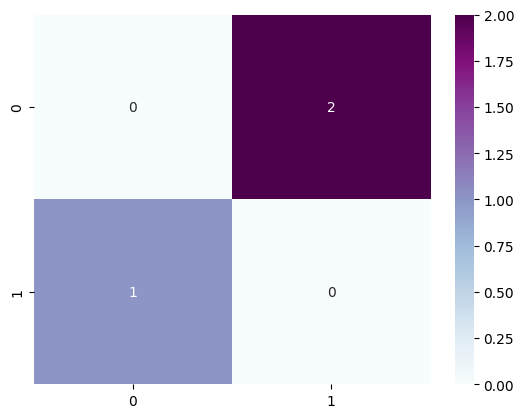

In [17]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,pred_LR)
print(cm)
import seaborn as sns
sns.heatmap(cm,cmap="BuPu",annot=True)